In [ ]:
import os
import numpy as np
import cv2
from numpy import load
from PIL import *
import glob
import pickle
import scipy.ndimage
import multiprocessing
from joblib import Parallel, delayed

import matplotlib.pyplot as plt

# Load Dicom files + Visualization 

In [ ]:
def load_scan(path):
    slices = [pydicom.dcmread(path + '/'  + s) for s in os.listdir(path)]
    slices = [s for s in slices if 'SliceLocation' in s]
    slices.sort(key = lambda x: int(x.InstanceNumber))
    try:
        slice_thickness = np.abs(slices[0].ImagePositionPatient[2] - 
                                 slices[1].ImagePositionPatient[2])
    except:
        slice_thickness = np.abs(slices[0].SliceLocation - 
                                 slices[1].SliceLocation)
    for s in slices:
        s.SliceThickness = slice_thickness
    return slices

In [ ]:
path="/content/drive/MyDrive/PFE/Data preprocessing/Mask-image/Dicom mask/Elite-1/Dicom_mask"
slices=load_scan(path)

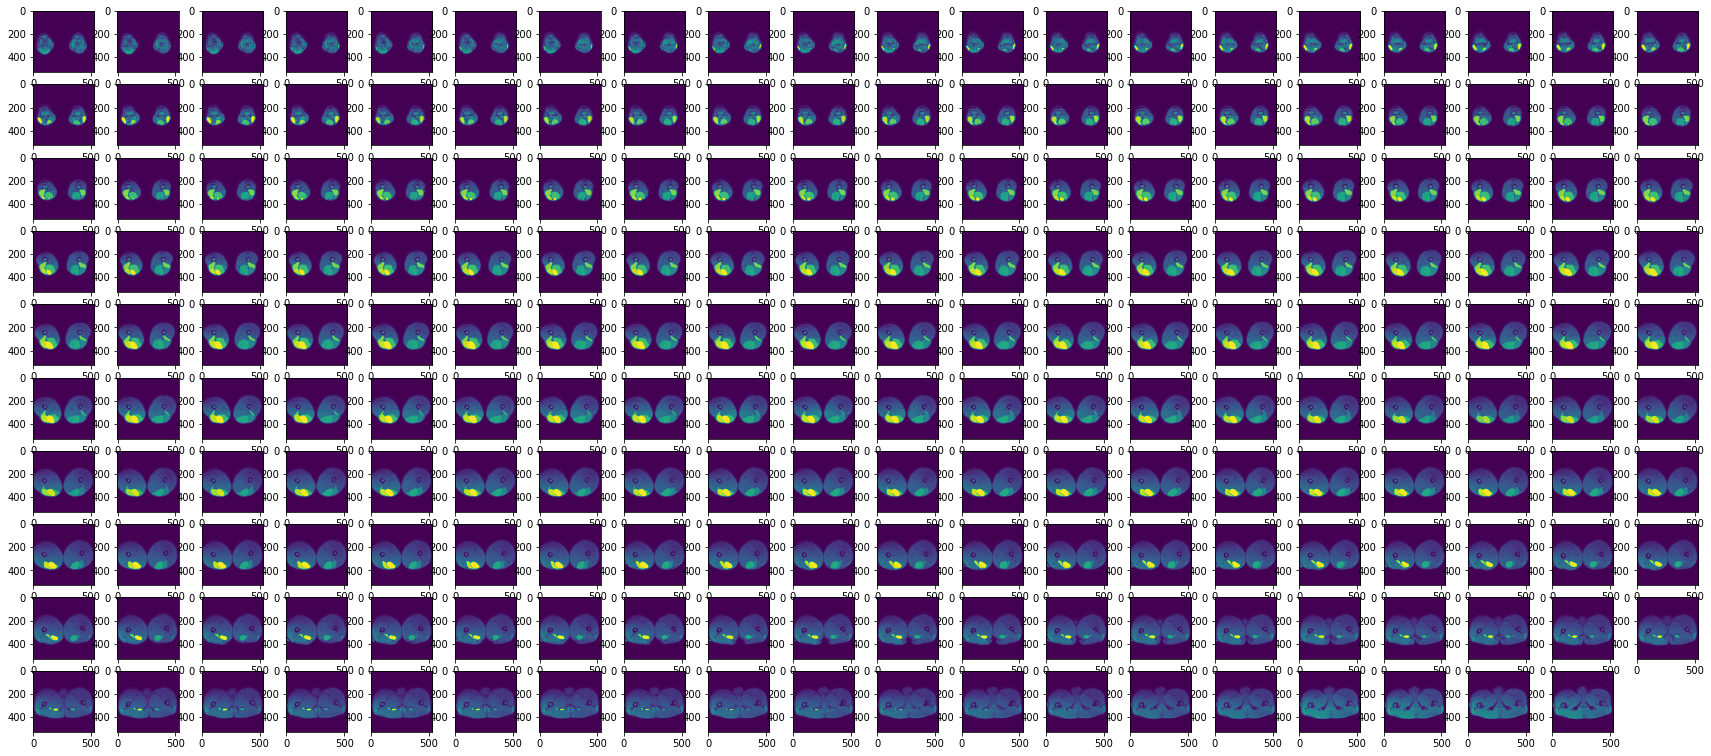

199


In [ ]:

fig=plt.figure(figsize=(30,20))
for num,each_slice in enumerate(slices):
  y=fig.add_subplot(15,20,num+1)
  y.imshow(each_slice.pixel_array)
plt.show()

print(len(slices))

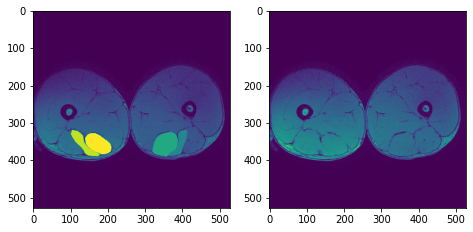

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(231)
plt.imshow(slices[150].pixel_array)
plt.subplot(232)
plt.imshow(slicesr[150].pixel_array)


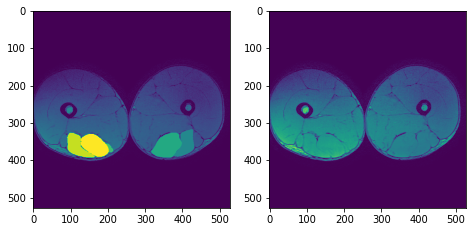

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(231)
plt.imshow(slices[140].pixel_array)
plt.subplot(232)
plt.imshow(slicesr[140].pixel_array)

# Converting Dicom to numpy 

In [ ]:
npy_folder="/content/drive/MyDrive/PFE/Data preprocessing/rawdata/numpy raw"
Data_Main_path = "/content/drive/MyDrive/PFE/Data preprocessing/rawdata/Dicom raw/"
Patient_names = sorted(os.listdir(Data_Main_path))
print(Patient_names)
Full_path_data= [Data_Main_path + x + '/Dicom_raw/' for x in Patient_names]

counter = 0
for patient in Full_path_data:
    unstacked_list = []
    for dicom_f in sorted(os.listdir(patient)):
         dicom = pydicom.read_file(patient+dicom_f)

         np_pixel_array = dicom.pixel_array
         unstacked_list.append(np_pixel_array)
        
    unstacked_list = np.array(unstacked_list)
    np.save(npy_folder+ Patient_names[counter] + '.npy',unstacked_list)
    counter=counter+1

# Crop left leg from numpy arrays

(184, 560, 560)


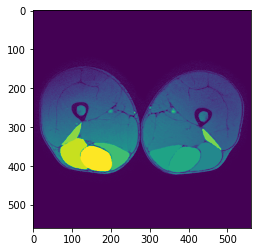

In [ ]:
mask=load("/content/drive/MyDrive/PFE/Data preprocessing/Mask-image/numpy-mask/numpy-maskElite-3.npy")
print(mask.shape)
plt.imshow(mask[100])
plt.show()

In [ ]:
def crop_left (np_array,npy_folderC) :


    data = load(np_array)

    leftslices = []
    for image in data:

        leftslices.append(image[194:450,:256])

    left_slices = np.array(leftslices)


    np.save(npy_folderC+'/E2-l.npy',left_slices)

    return

In [ ]:
np_array ='/content/drive/MyDrive/PFE/Data preprocessing/Mask-image/numpy-mask/numpy-maskElite-2.npy'
npy_folderC="/content/drive/MyDrive/PFE/Data preprocessing/Mask-image/left-mask"
crop_left(np_array,npy_folderC)

In [ ]:
def crop_right (np_array,npy_folderC) :


    data = load(np_array)

    leftslices = []
    for image in data:

        leftslices.append(image[144:400,256:])

    left_slices = np.array(leftslices)


    np.save(npy_folderC+'/E1.npy',left_slices)

    return

# Extraction data annotation 

Binary Mask

In [ ]:
def process_Mask(Mask_path,Binary_folder):

      Mask=load(Mask_path)


      mask_FBsh= np.array(list(map(lambda x: np.clip(np.where(x ==447, x, 0),0,1, np.where(x ==447, x, 0)),Mask)))
      mask_FBlh= np.array(list(map(lambda x: np.clip(np.where(x ==494, x, 0),0,1, np.where(x ==494, x, 0)),Mask)))
      mask_ST= np.array(list(map(lambda x: np.clip(np.where(x ==541, x, 0),0,1, np.where(x ==541, x, 0)),Mask)))
      mask_SM= np.array(list(map(lambda x: np.clip(np.where(x ==376, x, 0),0,1, np.where(x ==376, x, 0)),Mask)))

      mask_FBsh = np.expand_dims(mask_FBsh,-1)
      mask_FBlh = np.expand_dims(mask_FBlh,-1)
      mask_ST = np.expand_dims(mask_ST,-1)
      mask_SM = np.expand_dims(mask_SM,-1)

      binary_mask=np.concatenate([mask_FBsh,mask_FBlh,mask_ST,mask_SM],-1)
      np.save(Binary_folder+'/test.npy',binary_mask)

      return


In [ ]:
Mask_path=("/content/drive/MyDrive/PFE/Data preprocessing/Mask-image/left-mask/E1R.npy")
Binary_folder="/content/drive/MyDrive/PFE/Data preprocessing/Mask-image"
process_Mask(Mask_path,Binary_folder)
